# Import

In [105]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random
import copy

import scipy.stats as ss
from scipy.stats import norm
from scipy.stats import poisson
from scipy import spatial

# import code
from simulation import Simulation
from replicate_graph import layer_graph
import data
from data import get_station_G, stations_df, distances_df, set_random_speed_columns
from visualization import set_draw_attributes

import os

import re
from tqdm import tqdm

# Simulation

In [17]:
station_G = get_station_G()
set_random_speed_columns()
sim = Simulation(station_G, 24, 20, 10)
sim.add_dst("465",5)
high_volume_src_dstr = [10,20,30,40,50,60,50,40,30,20,30,40,50,60,50,40,30,20,10,5,0,0,0,0]
low_volume_src_dstr = [x//3 for x in high_volume_src_dstr]
sim.add_src("1",low_volume_src_dstr)

KeyError: 'charging_rate'

In [3]:
sim.run()

In [4]:
sim.data

{'num_cars_at_station': [[0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0,

In [5]:
for v in sim.vehicle_list:
    print(v.path)

['1', '1_100_in', '1_100_out', '378_0_in', '378_100_out', '465_0_in', '465_0_out', '465']
['1', '1_100_in', '1_100_out', '378_0_in', '378_100_out', '465_0_in', '465_0_out', '465']
['1', '1_100_in', '1_100_out', '378_0_in', '378_100_out', '465_0_in', '465_0_out', '465']
['1', '1_100_in', '1_100_out', '378_0_in', '378_100_out', '465_0_in', '465_0_out', '465']
['1', '1_100_in', '1_100_out', '378_0_in', '378_100_out', '465_0_in', '465_0_out', '465']
['1', '1_100_in', '1_100_out', '378_0_in', '378_100_out', '465_0_in', '465_0_out', '465']
['1', '1_100_in', '1_100_out', '378_0_in', '378_100_out', '465_0_in', '465_0_out', '465']
['1', '1_100_in', '1_100_out', '378_0_in', '378_100_out', '465_0_in', '465_0_out', '465']
['1', '1_100_in', '1_100_out', '378_0_in', '378_100_out', '465_0_in', '465_0_out', '465']
['1', '1_100_in', '1_100_out', '378_0_in', '378_100_out', '465_0_in', '465_0_out', '465']
['1', '1_100_in', '1_100_out', '378_0_in', '378_100_out', '465_0_in', '465_0_out', '465']
['1', '1_1

In [25]:
for v in sim.vehicle_list:
    print(v.location, ":", v.distance_along_segment)

('378_100_out', '465_0_in') : 683.7751647930394
('378_100_out', '465_0_in') : 663.5605307322537
('378_100_out', '465_0_in') : 644.5526993692991
('378_100_out', '465_0_in') : 625.6490745892911
('378_100_out', '465_0_in') : 607.0105970998158
('378_100_out', '465_0_in') : 483.7497428644326
('378_100_out', '465_0_in') : 467.59777541921966
('378_100_out', '465_0_in') : 451.44580797400664
('378_100_out', '465_0_in') : 435.2938405287936
('378_100_out', '465_0_in') : 419.9178297334336
('378_100_out', '465_0_in') : 296.37807532841754
('378_100_out', '465_0_in') : 279.8525008283504
('378_100_out', '465_0_in') : 262.6166445458939
('378_100_out', '465_0_in') : 244.6705064810481
('378_100_out', '465_0_in') : 226.72436841620237
('378_100_out', '465_0_in') : 73.92372978901643
('378_100_out', '465_0_in') : 52.80266413501174
('378_100_out', '465_0_in') : 31.68159848100704
('378_100_out', '465_0_in') : 10.56053282700234
('378_0_in', '378_100_out') : 2.4
('378_0_in', '378_100_out') : 0.8
('378_0_in', '37

{('1_0_in', '1_0_out'): Text(0.0, 0.0, '0'),
 ('1_0_in', '1_20_out'): Text(0.0, 10.0, '0.4'),
 ('1_0_in', '1_40_out'): Text(0.0, 20.0, '0.8'),
 ('1_0_in', '1_60_out'): Text(0.0, 30.0, '1.2'),
 ('1_0_in', '1_80_out'): Text(0.0, 40.0, '1.7'),
 ('1_0_in', '1_100_out'): Text(0.0, 50.0, '2.5'),
 ('228_0_in', '228_0_out'): Text(7.0, 0.0, '0'),
 ('228_0_in', '228_20_out'): Text(7.0, 10.0, '0.4'),
 ('228_0_in', '228_40_out'): Text(7.0, 20.0, '0.8'),
 ('228_0_in', '228_60_out'): Text(7.0, 30.0, '1.2'),
 ('228_0_in', '228_80_out'): Text(7.0, 40.0, '1.7'),
 ('228_0_in', '228_100_out'): Text(7.0, 50.0, '2.5'),
 ('378_0_in', '378_0_out'): Text(14.0, 0.0, '0'),
 ('378_0_in', '378_20_out'): Text(14.0, 10.0, '145.36303878744044'),
 ('378_0_in', '378_40_out'): Text(14.0, 20.0, '145.76303878744045'),
 ('378_0_in', '378_60_out'): Text(14.0, 30.0, '146.16303878744043'),
 ('378_0_in', '378_80_out'): Text(14.0, 40.0, '146.66303878744043'),
 ('378_0_in', '378_100_out'): Text(14.0, 50.0, '147.46303878744044')

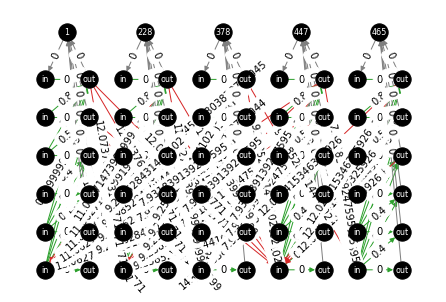

In [7]:
sim.battery_G
labels = {node:node[-2:] if "in" in node else node[-3:] for node in list(sim.battery_G.nodes)}
pos, edge_colors = set_draw_attributes(sim.battery_G, station_G)
edge_labels = nx.get_edge_attributes(sim.battery_G,'weight')
nx.draw(sim.battery_G, pos = pos, labels = labels, edge_color = list(edge_colors.values()), 
        font_size = 8, font_color="white", node_color="black")
nx.draw_networkx_edge_labels(sim.battery_G, pos, edge_labels=edge_labels)

# Animation
TODO

# Create graphs from csv's

In [8]:
stations_df.set_index("OID_").loc[228]["st_prv_cod"]

'CA'

In [9]:
distances_df.head(2)

,Unnamed: 0,OID_,Name,OriginID,DestinationID,DestinationRank,Total_Minutes,Total_TravelTime,Total_Miles,Total_Kilometers,...,speed_14,speed_15,speed_16,speed_17,speed_18,speed_19,speed_20,speed_21,speed_22,speed_23
1,185,186,Location 1 - Location 228,1,228,186,NaN,73.151367,NaN,100.524977,...,74.548351,76.076197,67.548185,64.839879,64.785286,58.560587,66.283818,71.981676,78.113725,84.716261
2,290,291,Location 1 - Location 378,1,378,291,NaN,184.181136,NaN,223.777273,...,65.910914,67.261739,59.721813,57.327301,57.279033,51.775549,58.603940,63.641624,69.063192,74.900734


In [10]:
increment = 50
station_G = get_station_G()
G = layer_graph(station_G, increment)
G.nodes;

# Visualize general data structure

In [11]:
# print(list(stations_df["OID_"]))
# print(station_G.nodes)
stations_df.head(1)

,OID_,OBJECTID,station_na,fuel_type_,status_cod,street_add,city,st_prv_cod,zip,station_ph,access_day,groups_wit,cards_acce,longitude,latitude,physical_capacity,charging_rate
0,1,14,Scripps Green Hospital,ELEC,AVBL,10666 N Torrey Pines Rd,La Jolla,CA,92037,858-554-9100,24 hours daily,Public,,-117.243,32.89947,5,50


In [12]:
# Set colors
for node in station_G.nodes:
    station_G.nodes[node]["color"] = "green"
    station_G.nodes[node]["node_size"] = 400
    
station_G.nodes["465"]["color"] = "blue" 
station_G.nodes["1"]["color"] = "blue" 
station_G.nodes["465"]["node_size"] = 400 
station_G.nodes["1"]["node_size"] = 400 

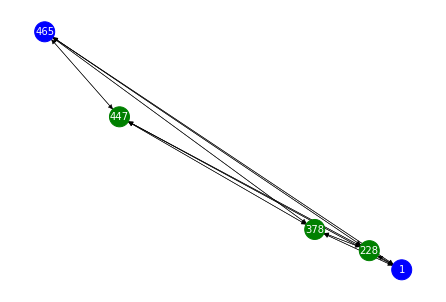

In [13]:
pos=nx.get_node_attributes(station_G,'pos')
color = nx.get_node_attributes(station_G,'color').values()
node_size = list(nx.get_node_attributes(station_G,'node_size').values())
labels = {node:node for node in list(station_G.nodes)}
nx.draw(station_G, pos = pos, node_size=node_size, width=.5, node_color=color, labels = labels, 
        font_color = "white", font_size = 10)

{('1_0_in', '1_0_out'): Text(0.0, 0.0, '0'),
 ('1_0_in', '1_50_out'): Text(0.0, 25.0, '1.0'),
 ('1_0_in', '1_100_out'): Text(0.0, 50.0, '2.5'),
 ('228_0_in', '228_0_out'): Text(7.0, 0.0, '0'),
 ('228_0_in', '228_50_out'): Text(7.0, 25.0, '1.0'),
 ('228_0_in', '228_100_out'): Text(7.0, 50.0, '2.5'),
 ('378_0_in', '378_0_out'): Text(14.0, 0.0, '0'),
 ('378_0_in', '378_50_out'): Text(14.0, 25.0, '1.0'),
 ('378_0_in', '378_100_out'): Text(14.0, 50.0, '2.5'),
 ('447_0_in', '447_0_out'): Text(21.0, 0.0, '0'),
 ('447_0_in', '447_50_out'): Text(21.0, 25.0, '1.0'),
 ('447_0_in', '447_100_out'): Text(21.0, 50.0, '2.5'),
 ('465_0_in', '465_0_out'): Text(28.0, 0.0, '0'),
 ('465_0_in', '465_50_out'): Text(28.0, 25.0, '1.0'),
 ('465_0_in', '465_100_out'): Text(28.0, 50.0, '2.5'),
 ('1_50_in', '1_50_out'): Text(0.0, 50.0, '0'),
 ('1_50_in', '1_100_out'): Text(0.0, 75.0, '1.5'),
 ('228_50_in', '228_50_out'): Text(7.0, 50.0, '0'),
 ('228_50_in', '228_100_out'): Text(7.0, 75.0, '1.5'),
 ('378_50_in', '3

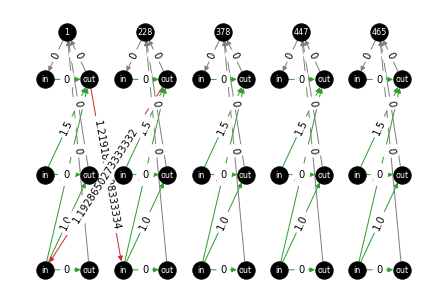

In [14]:
labels = {node:node[-2:] if "in" in node else node[-3:] for node in list(G.nodes)}
pos, edge_colors = set_draw_attributes(G, station_G)
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw(G, pos = pos, labels = labels, edge_color = list(edge_colors.values()), 
        font_size = 8, font_color="white", node_color="black")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Experiments for Debugging

In [102]:
columns = ['time', 'station', 'district', 'route', 'direction_of_travel', 
           'lane_type', 'station_length', 'samples', 'percent_observed', 
           'total_flow', 'avg_occupancy', 'avg_speed', 'delay_35', 'delay_40', 
           'delay_45', 'delay_50', 'delay_55', 'delay_60']
meta_csvs = {'3': 'd03_text_meta_2022_03_05.txt',
 '4':'d04_text_meta_2022_03_25.txt',
 '5':'d05_text_meta_2021_03_26.txt',
 '6':'d06_text_meta_2022_03_08.txt',
 '7':'d07_text_meta_2022_03_12.txt',
 '8':'d08_text_meta_2022_03_25.txt',
 '10':'d10_text_meta_2022_02_24.txt',
 '11':'d11_text_meta_2022_03_16.txt',
 '12':'d12_text_meta_2021_05_18.txt'}

df = pd.DataFrame()

for i in ['3', '4', '5', '6', '7', '8', '10', '11', '12']:
    num = i
    if int(i) < 10:
        num = "0" + i
    speed_df = speed_df = pd.read_csv("pems_ingest/station_data/d"+num+"_text_station_hour_2022_02.txt", sep = ',', header = None)
    speed_df = speed_df.iloc[: , :len(columns)]
    speed_df = speed_df.rename(columns = {i:columns[i] for i in range(len(columns))})
    speed_df["time"] = pd.to_datetime(speed_df['time'])
    speed_df["hour"] = speed_df["time"].dt.hour
    meta_df = pd.read_csv("pems_ingest/station_data/" + meta_csvs[i], sep = "\t")
    meta_df = meta_df[["ID", "Latitude", "Longitude"]]
    meta_df = meta_df.set_index("ID")
    speed_df = speed_df.join(meta_df, on = "station")
    df = pd.concat([df, speed_df])
df = df.dropna(axis="index", how="any", subset=["Latitude", "Longitude"])

In [103]:
coord_distances_df = distances_df.join(stations_df.set_index("OID_")[["longitude", "latitude"]], on= "OriginID", rsuffix="_origin")
coord_distances_df = coord_distances_df.join(stations_df.set_index("OID_")[["longitude", "latitude"]], on= "DestinationID", rsuffix="_dst")

In [106]:
def nearest_speed(x):
    lon = x["longitude"]
    lat = x["latitude"]
    d_lon = x["longitude_dst"]
    d_lat = x["latitude_dst"]
    src_res = tree.query([(lat,lon)])
    dst_res = tree.query([(d_lat,d_lon)])
    src_speed = df_h.iloc[src_res[1][0]]["avg_speed"]
    dst_speed = df_h.iloc[dst_res[1][0]]["avg_speed"]
    return (src_speed+dst_speed)/2

for h in tqdm(range(24)):
    df_h = df[df["hour"]==h]
    df_h = df_h.groupby(by=['station']).mean()
    df_h = df_h.dropna(axis="index", how="any", subset=["avg_speed", "Latitude", "Longitude"])
    coords = df_h[["Latitude", "Longitude"]].to_numpy()
    tree = spatial.KDTree(coords)
    coord_distances_df["speed_" + str(h)] = coord_distances_df.apply(nearest_speed, 1)

100%|██████████| 24/24 [1:57:06<00:00, 292.78s/it]  


In [88]:
coords = df_0[["Latitude", "Longitude"]].to_numpy()
tree = spatial.KDTree(coords)

def nearest_speed(x):
    lon = x["longitude"]
    lat = x["latitude"]
    d_lon = x["longitude_dst"]
    d_lat = x["latitude_dst"]
    src_res = tree.query([(lat,lon)])
    dst_res = tree.query([(d_lat,d_lon)])
    src_speed = df_h.iloc[src_res[1][0]]["avg_speed"]
    dst_speed = df_h.iloc[dst_res[1][0]]["avg_speed"]
    return (src_speed+dst_speed)/2

nearest_speed(coord_distances_df.iloc[0, :])

((array([0.01857309]), array([14927])), (array([0.01811995]), array([14687])))

In [89]:
coords

array([[  38.761062, -120.569835],
       [  38.761182, -120.569866],
       [  38.409782, -121.48412 ],
       ...,
       [  36.634694, -121.668155],
       [  36.634707, -121.668147],
       [  36.634719, -121.66814 ]])

In [107]:
coord_distances_df.head(3)

,OID_,Name,OriginID,DestinationID,DestinationRank,Total_Minutes,Total_TravelTime,Total_Miles,Total_Kilometers,Total_TimeAt1KPH,...,speed_14,speed_15,speed_16,speed_17,speed_18,speed_19,speed_20,speed_21,speed_22,speed_23
1,2,Location 1 - Location 64,1,64,2,NaN,2.774095,NaN,0.854192,NaN,...,66.058929,65.966071,67.503571,67.178571,65.976786,67.557143,68.189286,68.485714,68.687500,68.794643
2,3,Location 1 - Location 405,1,405,3,NaN,2.566403,NaN,0.927094,NaN,...,66.067857,65.403571,67.310714,67.117857,65.967857,67.539286,68.046429,68.239286,68.460714,68.660714
3,4,Location 1 - Location 470,1,470,4,NaN,2.321058,NaN,1.056027,NaN,...,67.428571,67.357143,68.282143,68.248214,67.033929,68.089286,68.660714,68.750000,68.942857,69.210714


In [108]:
coord_distances_df.to_csv("coord_distances.csv")